In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# insert your own filepath based on what you working director says
ucl_file_path = Path("C:\\Users\\emman\\Box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\UCL Shapefiles")
shp_file_path = Path("C:\\Users\\emman\\Box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\SA2 Shapefiles")
#read in the points for train stations dbf file
ent17 = gpd.read_file('POINT.dbf')
# get that file's info
ent17.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Train_St  1008 non-null   object  
 1   Street_N  1008 non-null   object  
 2   Street_T  1008 non-null   object  
 3   Entrance  1008 non-null   object  
 4   geometry  1008 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 39.5+ KB


# Create a shapefile that marks all train stop entrances along the Sydney UCL

In [3]:
# print the head of the dataframe 
ent17.head()

,Train_St,Street_N,Street_T,Entrance,geometry
0,Aberdeen,Macqueen,St,Ramp,POINT (150.89196 -32.16689)
1,Aberdeen,Macqueen,St,Stairs,POINT (150.89198 -32.16690)
2,Adamstown,St James,Rd,Ramp,POINT (151.72035 -32.93340)
3,Adamstown,St James,Rd,Stairs,POINT (151.72036 -32.93341)
4,Adamstown,Park,Ave,Path,POINT (151.72045 -32.93371)


In [4]:
# get its Coordinate reference system 
ent17.crs

{'init': 'epsg:4326'}

In [5]:
# read in NSW UCL Shapefile
ucl_gdf = gpd.read_file(ucl_file_path/'UCL_2016_AUST.shp')

In [6]:
# get its info
ucl_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   UCL_CODE16  1853 non-null   object  
 1   UCL_NAME16  1853 non-null   object  
 2   SSR_CODE16  1853 non-null   object  
 3   SSR_NAME16  1853 non-null   object  
 4   SOS_CODE16  1853 non-null   object  
 5   SOS_NAME16  1853 non-null   object  
 6   STE_CODE16  1853 non-null   object  
 7   STE_NAME16  1853 non-null   object  
 8   AREASQKM16  1853 non-null   float64 
 9   geometry    1835 non-null   geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 144.9+ KB


In [7]:
# Subset to only Sydney UCL
ucl_gdf = ucl_gdf[ucl_gdf.UCL_NAME16=='Sydney']

In [8]:
# Change the UCL shapefile's coordinate reference system to World Geodetic System
ucl_gdf.crs = {'init':'epsg:4326'}
# confirm crs changed
ucl_gdf.crs

{'init': 'epsg:4326'}

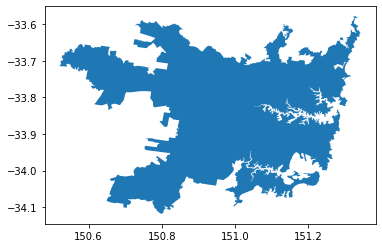

In [9]:
# plot the shapefile
ucl_gdf.plot()

In [10]:
# perform a spatial join on the train entrances with the UCL shapefile. Find all that all within the UCL boundaries
ent_ucl = gpd.sjoin(ent17,ucl_gdf,how='left',op='within')

In [11]:
# request information about the new shapefile
ent_ucl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Train_St     1008 non-null   object  
 1   Street_N     1008 non-null   object  
 2   Street_T     1008 non-null   object  
 3   Entrance     1008 non-null   object  
 4   geometry     1008 non-null   geometry
 5   index_right  715 non-null    float64 
 6   UCL_CODE16   715 non-null    object  
 7   UCL_NAME16   715 non-null    object  
 8   SSR_CODE16   715 non-null    object  
 9   SSR_NAME16   715 non-null    object  
 10  SOS_CODE16   715 non-null    object  
 11  SOS_NAME16   715 non-null    object  
 12  STE_CODE16   715 non-null    object  
 13  STE_NAME16   715 non-null    object  
 14  AREASQKM16   715 non-null    float64 
dtypes: float64(2), geometry(1), object(12)
memory usage: 126.0+ KB


In [12]:
# drop all null values in the dataframe for a plot
ent_ucl.dropna(inplace=True)

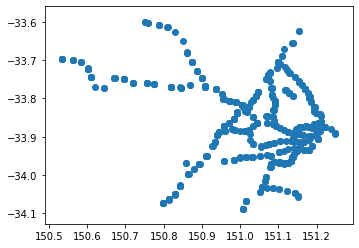

In [13]:
ent_ucl.plot()

# Create a shapefile that is only the SA2s that fall along the T3 Corridor

In [14]:
# Read shapefile of Sydney SA2s and subset to only include "Greater Sydney" GCC
sa2_shp = gpd.read_file(shp_file_path/'SA2_2016_AUST.dbf')
sa2_shp = sa2_shp[sa2_shp.GCC_NAME16=='Greater Sydney']

In [15]:
# request the info for the shapefile
sa2_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 312 entries, 27 to 575
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  312 non-null    object  
 1   SA2_5DIG16  312 non-null    object  
 2   SA2_NAME16  312 non-null    object  
 3   SA3_CODE16  312 non-null    object  
 4   SA3_NAME16  312 non-null    object  
 5   SA4_CODE16  312 non-null    object  
 6   SA4_NAME16  312 non-null    object  
 7   GCC_CODE16  312 non-null    object  
 8   GCC_NAME16  312 non-null    object  
 9   STE_CODE16  312 non-null    object  
 10  STE_NAME16  312 non-null    object  
 11  AREASQKM16  312 non-null    float64 
 12  geometry    312 non-null    geometry
dtypes: float64(1), geometry(1), object(11)
memory usage: 34.1+ KB


In [16]:
# set coordinate reference system to 4326 like above
sa2_shp.crs = {'init':'epsg:4326'}

In [17]:
# read in route_stop geojson file from transit.land 
route = gpd.read_file("routes.geojson")

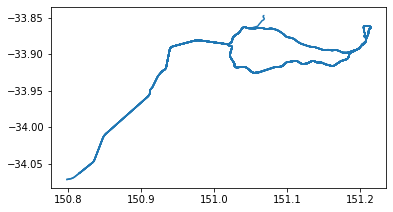

In [18]:
# plot the routes shape
route.plot()

In [19]:
# perform a spatial join to only include SA2s that intersect with the routes shapefile
route_ucl = gpd.sjoin(route,sa2_shp,how='right',op='intersects')

In [20]:
route_ucl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 312 entries, 338 to 575
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   index_left                          38 non-null     float64 
 1   id                                  38 non-null     object  
 2   onestop_id                          38 non-null     object  
 3   created_at                          38 non-null     object  
 4   updated_at                          38 non-null     object  
 5   tags                                38 non-null     object  
 6   created_or_updated_in_changeset_id  38 non-null     float64 
 7   name                                38 non-null     object  
 8   vehicle_type                        38 non-null     object  
 9   color                               38 non-null     object  
 10  stops_served_by_route               38 non-null     object  
 11  operated_by_onestop_id

In [21]:
route_ucl.dropna(inplace=True)

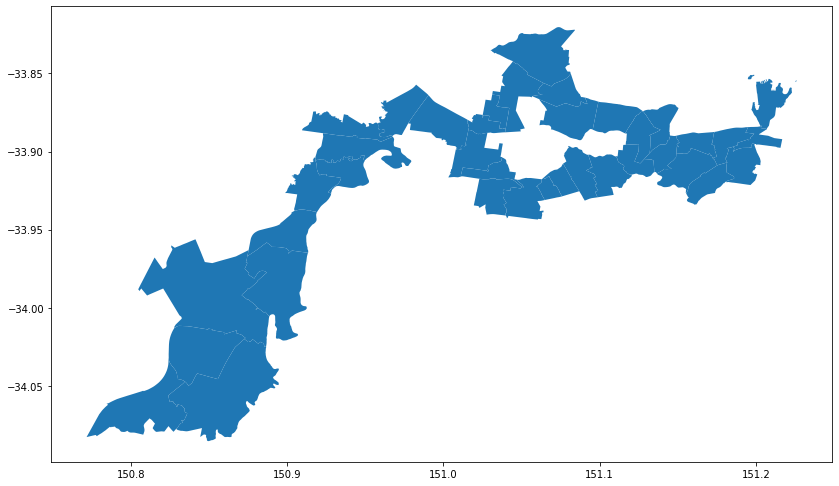

In [22]:
route_ucl.plot(figsize=(14,10))

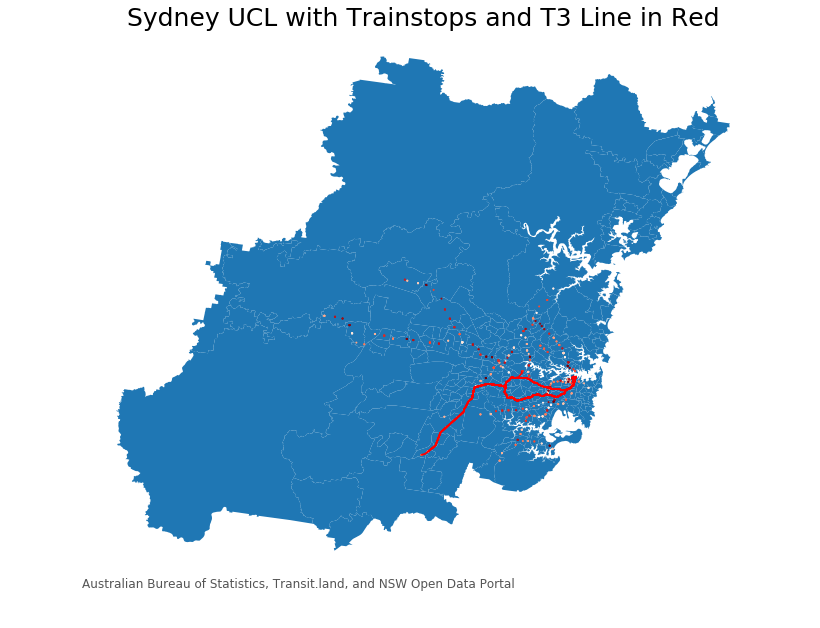

In [26]:
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shp.plot(ax=ax)

ent_ucl.plot(column="Train_St", 
              ax=base, 
              cmap="Reds",
             markersize=1)

route.plot(color='Red',ax=base)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Sydney UCL with Trainstops and T3 Line in Red', fontdict={'fontsize':25})

ax.annotate('Australian Bureau of Statistics, Transit.land, and NSW Open Data Portal',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Create a UCL shapefile out of the SA2s from the 2016 Australia SA2 Shapefile

In [27]:
# perform a spatial join to get the SA2s that fall within the boundaries of the UCL shapefile 
sa2_ucl = gpd.sjoin(sa2_shp,ucl_gdf,how='left',op='within')

In [31]:
# Drop all null values in the UCL shapefile 
sa2_ucl.dropna(inplace=True)

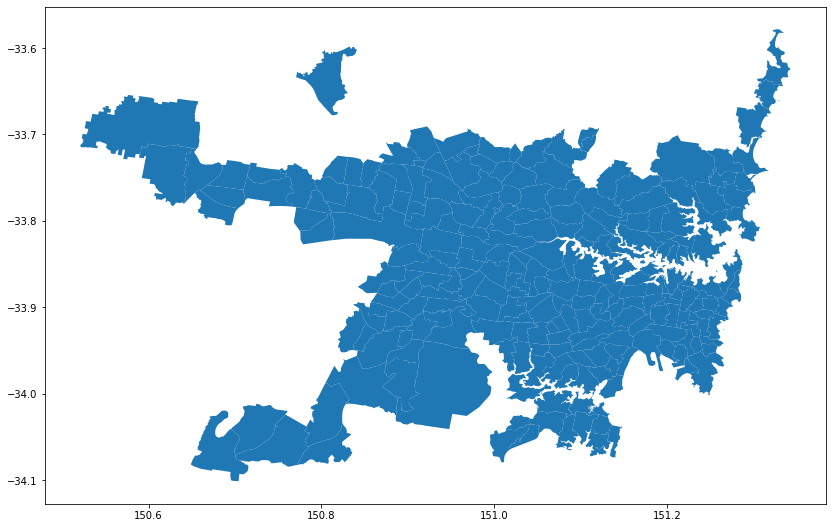

In [32]:
# plot this map
sa2_ucl.plot(figsize=(14,10))

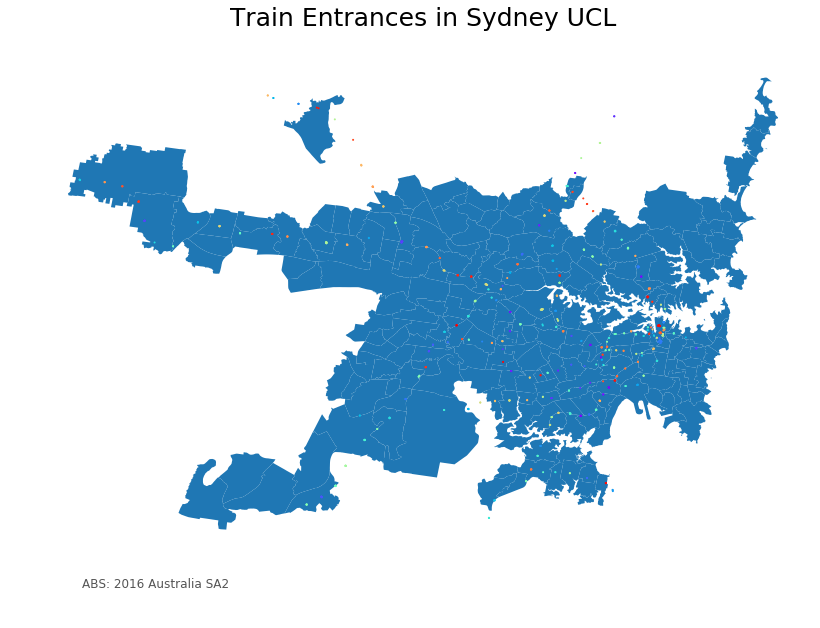

In [33]:
# Create a map of the the generated UCL SA2 shapefile and plot the train entrances 

figure, ax = plt.subplots(figsize=(14,10))
base = sa2_ucl.plot(ax=ax)
ent_ucl.plot(column="Train_St", 
              ax=base, 
              cmap="rainbow",
             markersize=1)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Train Entrances in Sydney UCL', fontdict={'fontsize':25})

ax.annotate('ABS: 2016 Australia SA2',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

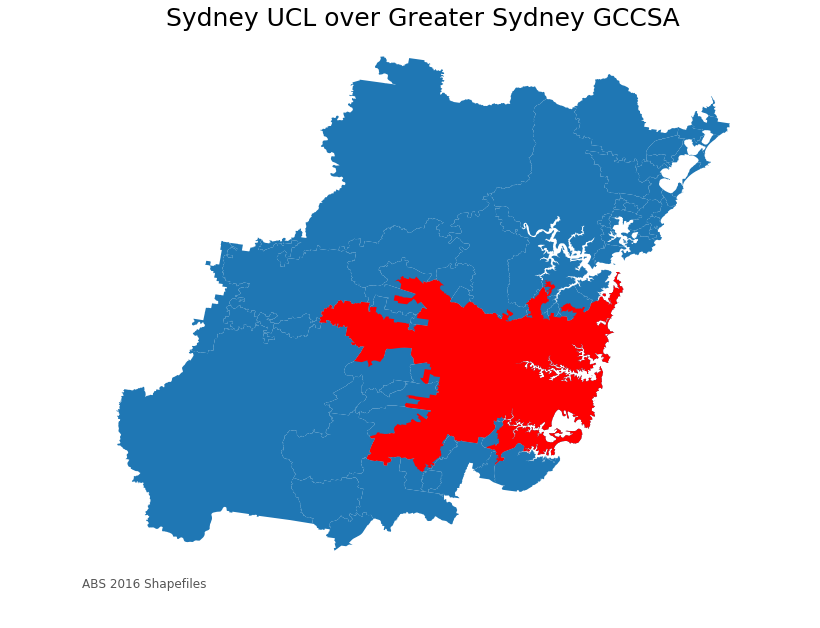

In [36]:
# Plot the UCL Shapefile over the Greater Sydney GCC area to see what the discrepancy between our joined shape and the actual shapefile is

figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shp.plot(ax=ax)
ucl_gdf.plot(color='Red', ax=base)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Sydney UCL over Greater Sydney GCCSA', fontdict={'fontsize':25})

ax.annotate('ABS 2016 Shapefiles',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

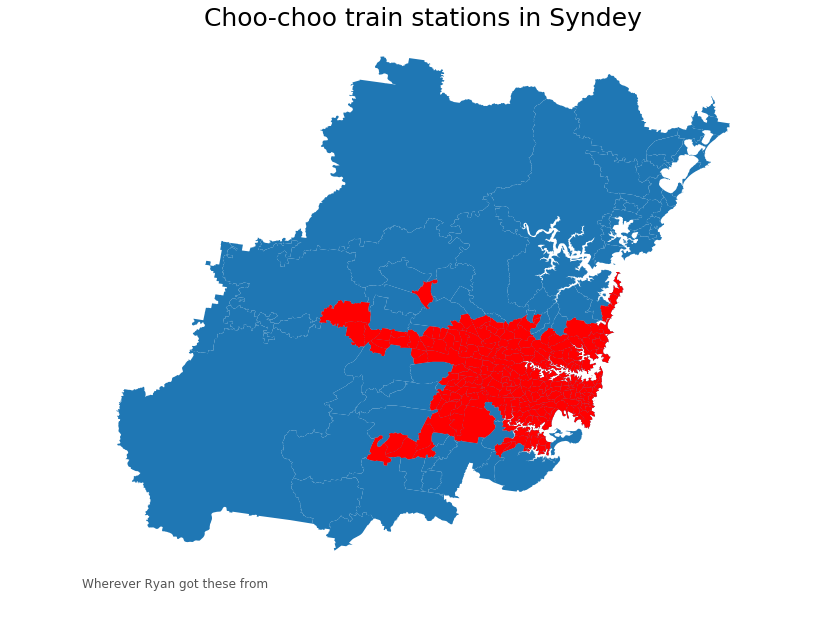

In [37]:
# Plot the spatially joined UCL Shapefile over the Greater Sydney GCC area to see what the discrepancy between our joined shape and the actual shapefile is

figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shp.plot(ax=ax)
sa2_ucl.plot(color='Red', ax=base)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Choo-choo train stations in Syndey', fontdict={'fontsize':25})

ax.annotate('Wherever Ryan got these from',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Data outputs for all data tables

In [ ]:
#sa2_ucl.to_csv('sa2_ucl.csv')

In [ ]:
#ent_ucl.to_file("entrances_ucl_2017.shp")

In [ ]:
#ent_ucl.to_file("entrances_ucl_2017.dbf")

In [ ]:
#route_ucl.to_csv("t3_mainline.csv")

In [ ]:
#sa2_ucl.to_file("sa2_ucl_sydney.shp")

In [ ]:
#sa2_ucl.to_file("sa2_ucl_sydney.dbf")